# 공공데이터 상권정보 분석해보기
 * https://www.data.go.kr/data/15069540/fileData.do
 * 국가중점데이터인 상권정보 우선 분석
 * 의료기관 분석부터


In [315]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib_inline.backend_inline import set_matplotlib_formats

## 시각화를 위한 폰트 설정 

In [316]:
plt.rc("font", family='AppleGothic')
plt.rc('axes', unicode_minus=False)
set_matplotlib_formats('retina')

## 1.1 데이터 불러오기, 개요 살펴보기

In [320]:
df = pd.read_csv(
    "/Users/brian0644/Desktop/python/부스트코스 - 데이터사이언스/data/소상공인시장진흥공단_상가(상권)정보_의료기관_20190930/소상공인시장진흥공단_상가업소정보_의료기관_201909.csv", encoding ="cp949")

In [321]:
df.shape # 데이터 개수, 컬럼 개수 확인하기

(91335, 39)

In [245]:
df.head() # 위에서 5번째 까지 출력

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
0,19956873,하나산부인과,S,의료,S01,병원,S01B10,산부인과,경기도,41273.0,...,경기도 안산시 단원구 선부동 1081,4.130000e+11,경기도 안산시 단원구 달미로,10,4.130000e+24,경기도 안산시 단원구 달미로 10,425764.0,15236.0,126.814295,37.336344
1,20024149,타워광명내과의원,S,의료,S01,병원,S01B07,내과/외과,서울특별시,11680.0,...,서울특별시 강남구 도곡동 467-14,1.170000e+11,서울특별시 강남구 언주로30길,39,1.170000e+24,서울특별시 강남구 언주로30길 39,135270.0,6292.0,127.053198,37.488742
2,20152277,조정현신경외과의원,S,의료,S01,병원,S01B15,신경외과,경기도,41390.0,...,경기도 시흥시 정왕동 1740-1,4.140000e+11,경기도 시흥시 중심상가로,178,4.140000e+24,경기도 시흥시 중심상가로 178,429450.0,15066.0,126.734841,37.344955
3,20350610,한귀원정신과의원,S,의료,S01,병원,S01B99,기타병원,부산광역시,26500.0,...,부산광역시 수영구 광안동 74-1,2.650000e+11,부산광역시 수영구 수영로,688,2.650000e+24,부산광역시 수영구 수영로 688,613100.0,48266.0,129.115438,35.166872
4,20364049,더블유스토어수지점,S,의료,S02,약국/한약방,S02A01,약국,경기도,41465.0,...,경기도 용인시 수지구 풍덕천동 712-2,4.150000e+11,경기도 용인시 수지구 문정로,32,4.150000e+24,경기도 용인시 수지구 문정로 32,448170.0,16837.0,127.095522,37.323528


In [246]:
df.tail() # 아래서 5번째 까지 출력

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
91330,16196725,온누리약국,S,의료,S02,약국/한약방,S02A01,약국,대전광역시,30170.0,...,대전광역시 서구 둔산동 1507,3.020000e+11,대전광역시 서구 문예로,67,3.020000e+24,대전광역시 서구 문예로 67,302831.0,35240.0,127.389865,36.352728
91331,16192180,리원,S,의료,S07,의료관련서비스업,S07A07,산후조리원,경기도,41281.0,...,경기도 고양시 덕양구 화정동 1146,4.130000e+11,경기도 고양시 덕양구 성신로,14,4.130000e+24,경기도 고양시 덕양구 성신로 14,412827.0,10503.0,126.830144,37.627530
91332,16127538,참좋은요양병원,S,의료,S01,병원,S01B17,노인/치매병원,부산광역시,26410.0,...,부산광역시 금정구 장전동 538-1,2.640000e+11,부산광역시 금정구 금강로,209,2.640000e+24,부산광역시 금정구 금강로 209,609841.0,46294.0,129.082790,35.227138
91333,16108681,경희중앙한의원,S,의료,S01,병원,S01B06,한의원,서울특별시,11740.0,...,서울특별시 강동구 길동 345-9,1.170000e+11,서울특별시 강동구 천중로,213,1.170000e+24,서울특별시 강동구 천중로 213,134811.0,5303.0,127.143958,37.540993
91334,16109073,천안김안과천안역본점의원,S,의료,S01,병원,S01B13,안과의원,충청남도,44131.0,...,충청남도 천안시 동남구 원성동 266-17,4.410000e+11,충청남도 천안시 동남구 중앙로,92,4.410000e+24,충청남도 천안시 동남구 중앙로 92,330952.0,31127.0,127.152651,36.806640


In [247]:
df.info() # 데이터 요약하기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   상권업종대분류코드  91335 non-null  object 
 3   상권업종대분류명   91335 non-null  object 
 4   상권업종중분류코드  91335 non-null  object 
 5   상권업종중분류명   91335 non-null  object 
 6   상권업종소분류코드  91335 non-null  object 
 7   상권업종소분류명   91335 non-null  object 
 8   시도명        90956 non-null  object 
 9   시군구코드      90956 non-null  float64
 10  시군구명       90956 non-null  object 
 11  행정동코드      91335 non-null  int64  
 12  행정동명       90956 non-null  object 
 13  법정동코드      91280 non-null  float64
 14  법정동명       91280 non-null  object 
 15  지번코드       91335 non-null  float64
 16  대지구분코드     91335 non-null  int64  
 17  대지구분명      91335 non-null  object 
 18  지번본번지      91335 non-null  int64  
 19  지번주소       91335 non-null  object 
 20  도로명코드 

-> info()를 통해 데이터를 살펴 보니 총 91335개의 데이터 중 그만큼 데이터를 가지지 못한 칼럼도 있음 -> 결측치 발생

In [248]:
df.columns

Index(['상가업소번호', '상호명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드', '상권업종중분류명',
       '상권업종소분류코드', '상권업종소분류명', '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명',
       '법정동코드', '법정동명', '지번코드', '대지구분코드', '대지구분명', '지번본번지', '지번주소', '도로명코드',
       '도로명', '건물본번지', '건물관리번호', '도로명주소', '구우편번호', '신우편번호', '경도', '위도'],
      dtype='object')

In [249]:
df.dtypes

상가업소번호         int64
상호명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
시도명           object
시군구코드        float64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드        float64
법정동명          object
지번코드         float64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번주소          object
도로명코드        float64
도로명           object
건물본번지          int64
건물관리번호       float64
도로명주소         object
구우편번호        float64
신우편번호        float64
경도           float64
위도           float64
dtype: object

## 1.2 결측치

In [250]:
df.isnull() # True가 나온다면 그것은 결측칭

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91330,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
91331,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
91332,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
91333,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [251]:
df.isnull().sum() # True = 1이기 때문에 sum으로 다 더해주면 해당 칼럼들이 결측치를 얼마나 가지고 있는지 확인가능

상가업소번호         0
상호명            0
상권업종대분류코드      0
상권업종대분류명       0
상권업종중분류코드      0
상권업종중분류명       0
상권업종소분류코드      0
상권업종소분류명       0
시도명          379
시군구코드        379
시군구명         379
행정동코드          0
행정동명         379
법정동코드         55
법정동명          55
지번코드           0
대지구분코드         0
대지구분명          0
지번본번지          0
지번주소           0
도로명코드          0
도로명            0
건물본번지          0
건물관리번호         0
도로명주소          0
구우편번호         12
신우편번호          2
경도             0
위도             0
dtype: int64

<Axes: >

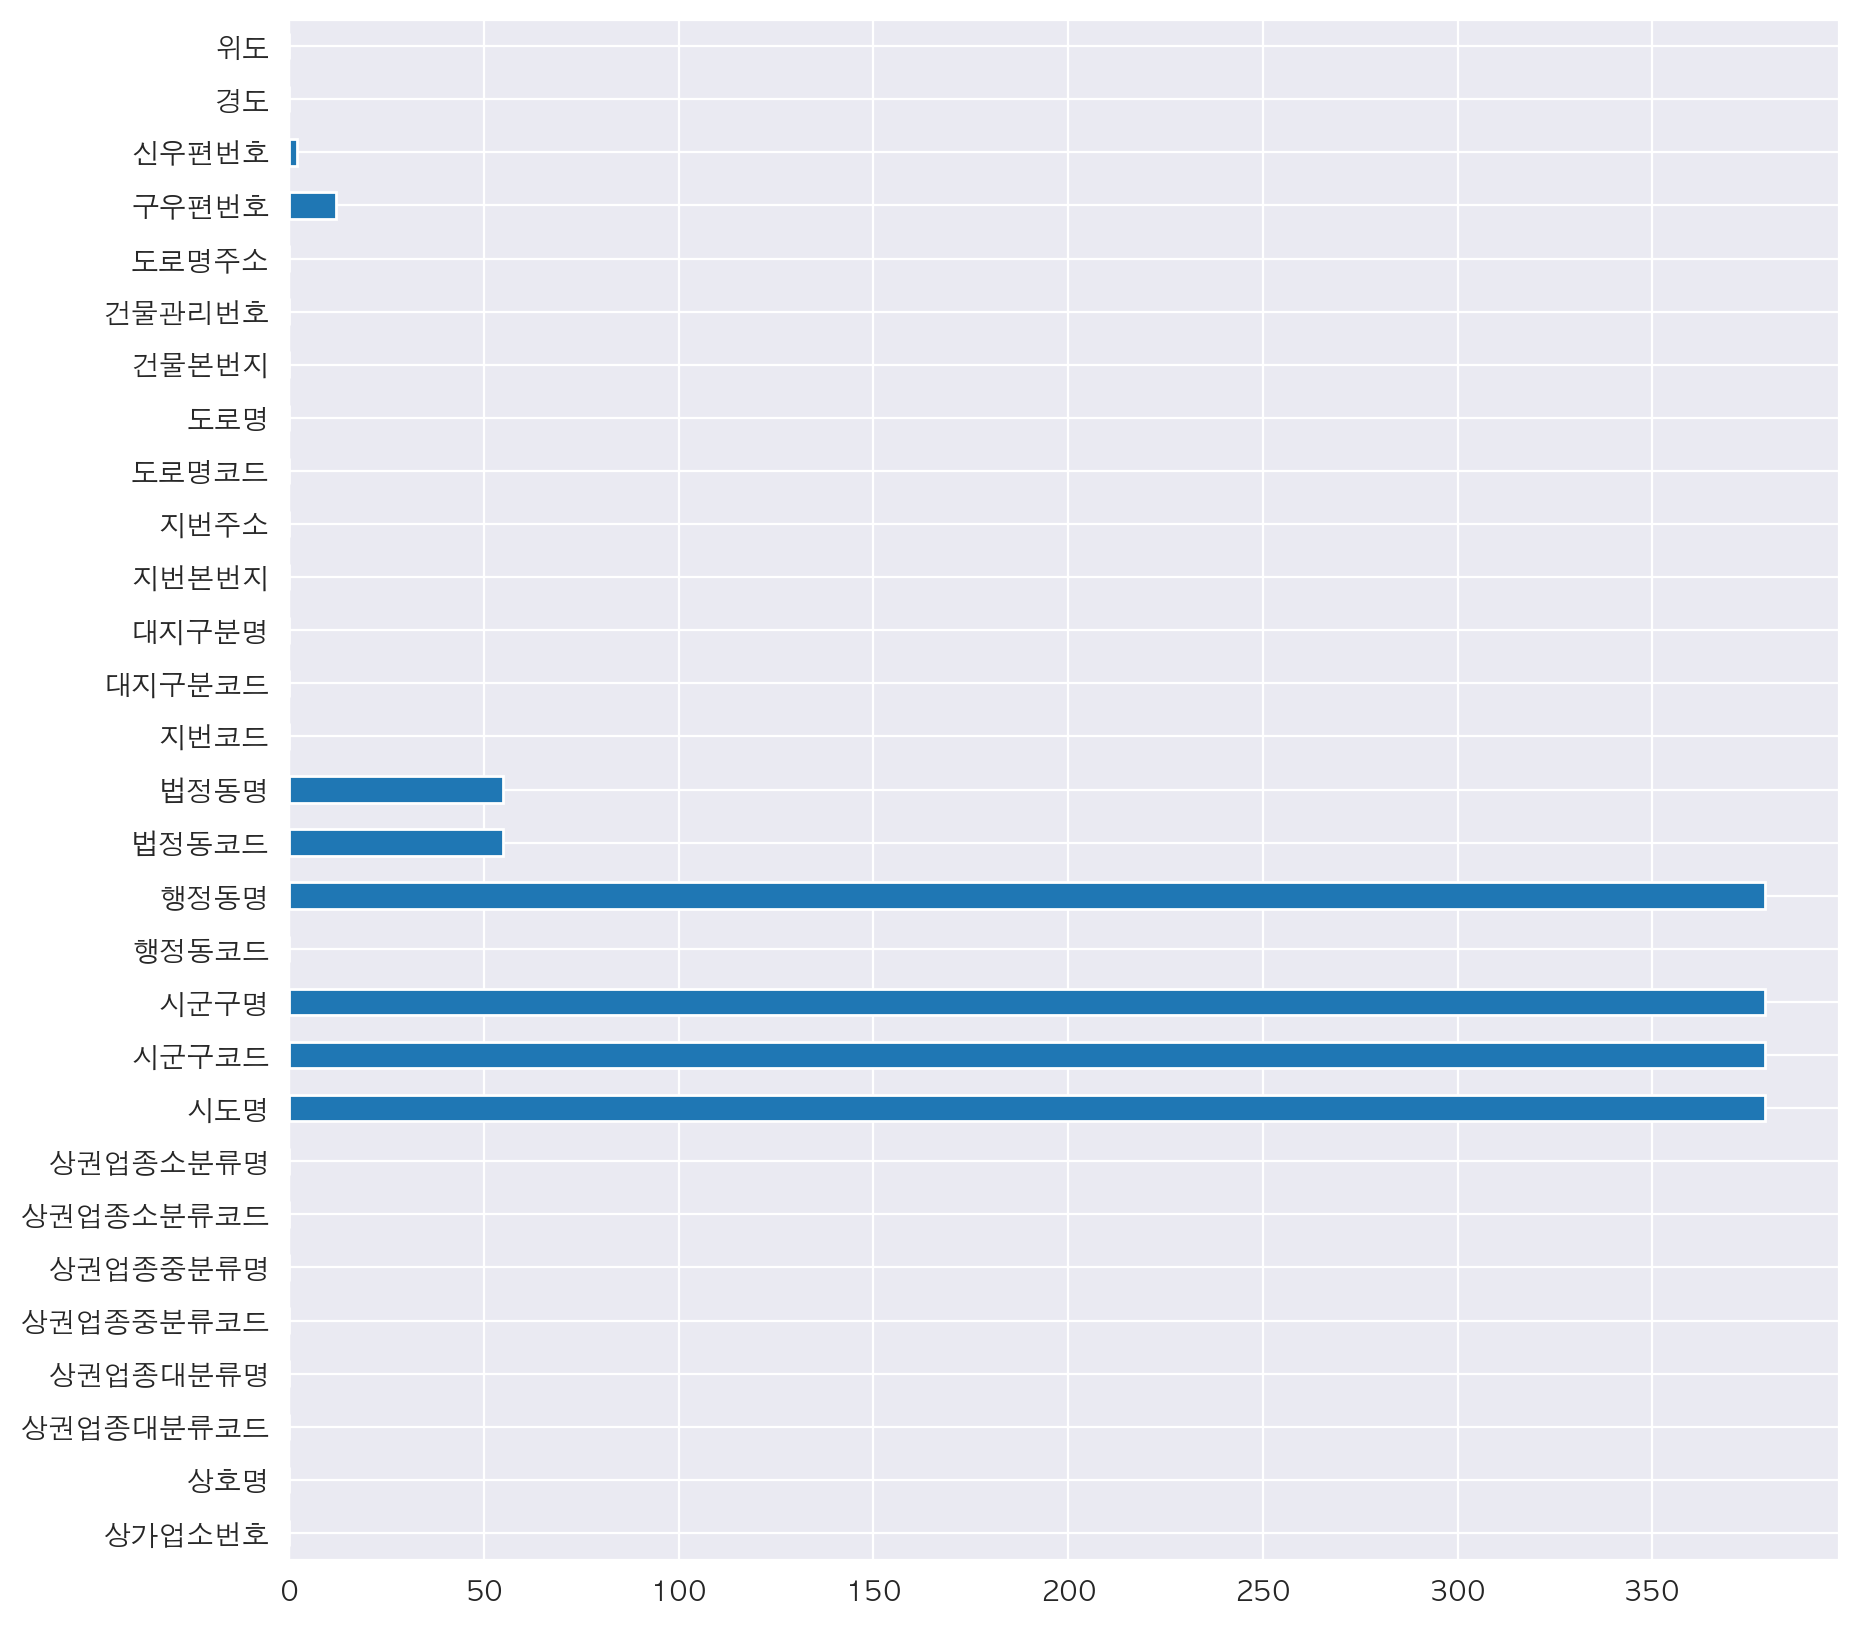

In [252]:
null_count = df.isnull().sum()
#null_count.plot()   # 함수 그리기
null_count.plot.barh(figsize=(10,10))  # plot.bar (세로 막대) , plot.barh (가로 막대), figsize=() 글자 크기 조정, rot = 각도 조절

In [253]:
df_null_count = null_count.reset_index()    # 결측치 데이터 프레임으로 변환
# df_null_count.head()
df_null_count.columns = ["컬럼명" , "결측치수"] # 해당 데이터프레임 컬럼 이름 바꾸기
df_null_count

,컬럼명,결측치수
0,상가업소번호,0
1,상호명,0
2,상권업종대분류코드,0
3,상권업종대분류명,0
4,상권업종중분류코드,0
5,상권업종중분류명,0
6,상권업종소분류코드,0
7,상권업종소분류명,0
8,시도명,379
9,시군구코드,379


In [254]:
df_null_count_top = df_null_count.sort_values(by = "결측치수", ascending = False).head(10)  # 결측치수가 높은 값들 우선으로 내림차순 정렬

## 3. 특정 칼럼만 불러오기

In [255]:
df["지점명"]       # NaN은 결측치

KeyError: '지점명'

In [256]:
df_null_count["컬럼명"]

0        상가업소번호
1           상호명
2     상권업종대분류코드
3      상권업종대분류명
4     상권업종중분류코드
5      상권업종중분류명
6     상권업종소분류코드
7      상권업종소분류명
8           시도명
9         시군구코드
10         시군구명
11        행정동코드
12         행정동명
13        법정동코드
14         법정동명
15         지번코드
16       대지구분코드
17        대지구분명
18        지번본번지
19         지번주소
20        도로명코드
21          도로명
22        건물본번지
23       건물관리번호
24        도로명주소
25        구우편번호
26        신우편번호
27           경도
28           위도
Name: 컬럼명, dtype: object

In [257]:
drop_columns = df_null_count_top["컬럼명"].tolist()
drop_columns

['시도명',
 '시군구코드',
 '행정동명',
 '시군구명',
 '법정동코드',
 '법정동명',
 '구우편번호',
 '신우편번호',
 '건물관리번호',
 '건물본번지']

In [258]:
df[drop_columns].head()

,시도명,시군구코드,행정동명,시군구명,법정동코드,법정동명,구우편번호,신우편번호,건물관리번호,건물본번지
0,경기도,41273.0,선부3동,안산시 단원구,4.127311e+09,선부동,425764.0,15236.0,4.130000e+24,10
1,서울특별시,11680.0,도곡2동,강남구,1.168012e+09,도곡동,135270.0,6292.0,1.170000e+24,39
2,경기도,41390.0,정왕1동,시흥시,4.139013e+09,정왕동,429450.0,15066.0,4.140000e+24,178
3,부산광역시,26500.0,광안3동,수영구,2.650010e+09,광안동,613100.0,48266.0,2.650000e+24,688
4,경기도,41465.0,풍덕천1동,용인시 수지구,4.146510e+09,풍덕천동,448170.0,16837.0,4.150000e+24,32


## 4. 결측치 제거하기

In [259]:
print(df.shape)
df = df.drop(drop_columns, axis = 1)     # 행 기준 드롭은 axis = 1 , df에 다시 넣어줘야 적용 -> 결측치가 많은 컬럼들 10개(head(10))은 드롭
print(df.shape)

(91335, 29)
(91335, 19)


In [260]:
df.info()                                # 데이터가 이전에는 29메가 -> 드롭 후 20메가 == 결측치 제거됐음을 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   상권업종대분류코드  91335 non-null  object 
 3   상권업종대분류명   91335 non-null  object 
 4   상권업종중분류코드  91335 non-null  object 
 5   상권업종중분류명   91335 non-null  object 
 6   상권업종소분류코드  91335 non-null  object 
 7   상권업종소분류명   91335 non-null  object 
 8   행정동코드      91335 non-null  int64  
 9   지번코드       91335 non-null  float64
 10  대지구분코드     91335 non-null  int64  
 11  대지구분명      91335 non-null  object 
 12  지번본번지      91335 non-null  int64  
 13  지번주소       91335 non-null  object 
 14  도로명코드      91335 non-null  float64
 15  도로명        91335 non-null  object 
 16  도로명주소      91335 non-null  object 
 17  경도         91335 non-null  float64
 18  위도         91335 non-null  float64
dtypes: float64(4), int64(4), object(11)
memory usa

## 5. 기초통계값 보기

In [261]:
# 평균값
df["위도"].mean()

np.float64(36.62471119236065)

In [262]:
# 중앙값
df["위도"].median()

np.float64(37.23465232)

In [263]:
# 최댓값
df["위도"].max()

np.float64(38.49965857)

In [264]:
# 최솟값
df["위도"].min()

np.float64(33.21928967)

In [265]:
# 빈도수
df["위도"].count()

np.int64(91335)

In [266]:
# 기초 통계값 요약
df["위도"].describe()

count    91335.000000
mean        36.624711
std          1.041361
min         33.219290
25%         35.811830
50%         37.234652
75%         37.507463
max         38.499659
Name: 위도, dtype: float64

In [267]:
# 컬럼 두개 리스트로 가져와서 기초 통계값 요약
df[["위도","경도"]].describe()

,위도,경도
count,91335.000000,91335.000000
mean,36.624711,127.487524
std,1.041361,0.842877
min,33.219290,124.717632
25%,35.811830,126.914297
50%,37.234652,127.084551
75%,37.507463,128.108919
max,38.499659,130.909912


In [268]:
# describe로 문자열 데이터타입의 요약을 보기
df.describe(include="number")       # 수치형 데이터만

,상가업소번호,행정동코드,지번코드,대지구분코드,지번본번지,도로명코드,경도,위도
count,9.133500e+04,9.133500e+04,9.133500e+04,91335.000000,91335.000000,9.133500e+04,91335.000000,91335.000000
mean,2.121818e+07,3.293232e+09,3.293350e+18,1.001336,587.534549,3.293345e+11,127.487524,36.624711
std,5.042828e+06,1.297387e+09,1.297268e+18,0.036524,582.519364,1.297263e+11,0.842877,1.041361
min,2.901108e+06,1.111052e+09,1.110000e+18,1.000000,1.000000,1.110000e+11,124.717632,33.219290
25%,2.001931e+07,2.635065e+09,2.640000e+18,1.000000,162.000000,2.640000e+11,126.914297,35.811830
50%,2.211900e+07,4.111758e+09,4.110000e+18,1.000000,462.000000,4.110000e+11,127.084551,37.234652
75%,2.480984e+07,4.311370e+09,4.310000e+18,1.000000,858.000000,4.310000e+11,128.108919,37.507463
max,2.852470e+07,5.013061e+09,5.010000e+18,2.000000,7338.000000,5.010000e+11,130.909912,38.499659


In [269]:
df.describe(include="object")       # 문자형 데이터만 -> top은 가장 많이 등장한 단어, freq 가장 많이 등장한 단어가 몇번 등장했는지

,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,대지구분명,지번주소,도로명,도로명주소
count,91335,91335,91335,91335,91335,91335,91335,91335,91335,91335,91335
unique,56908,1,1,5,5,34,34,2,53118,16610,54031
top,리원,S,의료,S01,병원,S02A01,약국,대지,서울특별시 동대문구 제기동 965-1,서울특별시 강남구 강남대로,서울특별시 동대문구 약령중앙로8길 10
freq,152,91335,91335,60774,60774,18964,18964,91213,198,326,198


In [270]:
df.describe(include="all")          # 문자형 수치형 둘다 요약

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,행정동코드,지번코드,대지구분코드,대지구분명,지번본번지,지번주소,도로명코드,도로명,도로명주소,경도,위도
count,9.133500e+04,91335,91335,91335,91335,91335,91335,91335,9.133500e+04,9.133500e+04,91335.000000,91335,91335.000000,91335,9.133500e+04,91335,91335,91335.000000,91335.000000
unique,NaN,56908,1,1,5,5,34,34,NaN,NaN,NaN,2,NaN,53118,NaN,16610,54031,NaN,NaN
top,NaN,리원,S,의료,S01,병원,S02A01,약국,NaN,NaN,NaN,대지,NaN,서울특별시 동대문구 제기동 965-1,NaN,서울특별시 강남구 강남대로,서울특별시 동대문구 약령중앙로8길 10,NaN,NaN
freq,NaN,152,91335,91335,60774,60774,18964,18964,NaN,NaN,NaN,91213,NaN,198,NaN,326,198,NaN,NaN
mean,2.121818e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.293232e+09,3.293350e+18,1.001336,NaN,587.534549,NaN,3.293345e+11,NaN,NaN,127.487524,36.624711
std,5.042828e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.297387e+09,1.297268e+18,0.036524,NaN,582.519364,NaN,1.297263e+11,NaN,NaN,0.842877,1.041361
min,2.901108e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.111052e+09,1.110000e+18,1.000000,NaN,1.000000,NaN,1.110000e+11,NaN,NaN,124.717632,33.219290
25%,2.001931e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.635065e+09,2.640000e+18,1.000000,NaN,162.000000,NaN,2.640000e+11,NaN,NaN,126.914297,35.811830
50%,2.211900e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.111758e+09,4.110000e+18,1.000000,NaN,462.000000,NaN,4.110000e+11,NaN,NaN,127.084551,37.234652
75%,2.480984e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.311370e+09,4.310000e+18,1.000000,NaN,858.000000,NaN,4.310000e+11,NaN,NaN,128.108919,37.507463


In [271]:
# 중복 제거한 값 보기
df["상권업종대분류명"].unique()         # nunique는 숫자세주기

array(['의료'], dtype=object)

In [272]:
# 그룹화된 요약값 보기
df["시도명"].head()

KeyError: '시도명'

In [273]:
# 시도명을 세어봅시다
city_normalize = df["시도명"].value_counts(normalize=True) # normalize = True를 사용하면 비율을 구할 수 있음


KeyError: '시도명'

<Axes: ylabel='시도명'>

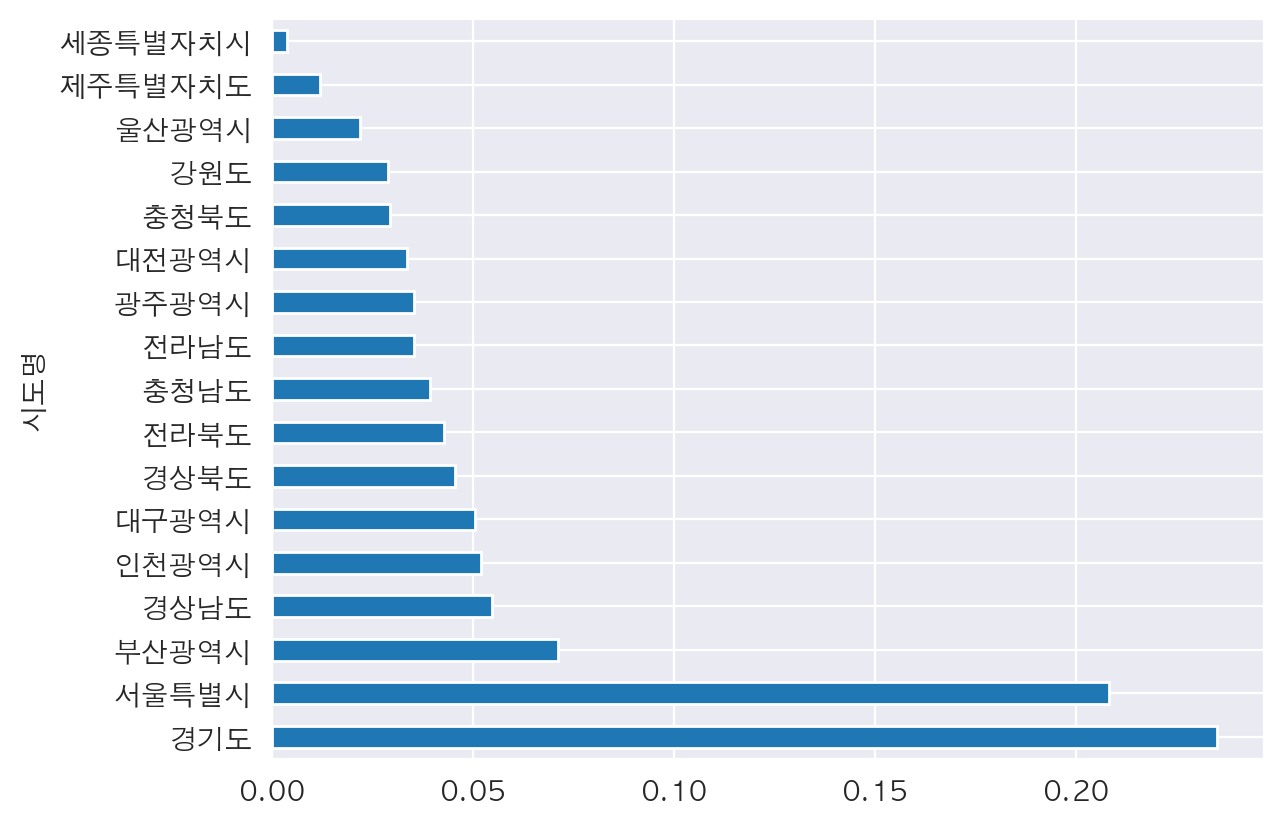

In [274]:
city_normalize.plot.barh()                  # 변수에 저장하고 가로 막대 그리기


<Axes: ylabel='proportion'>

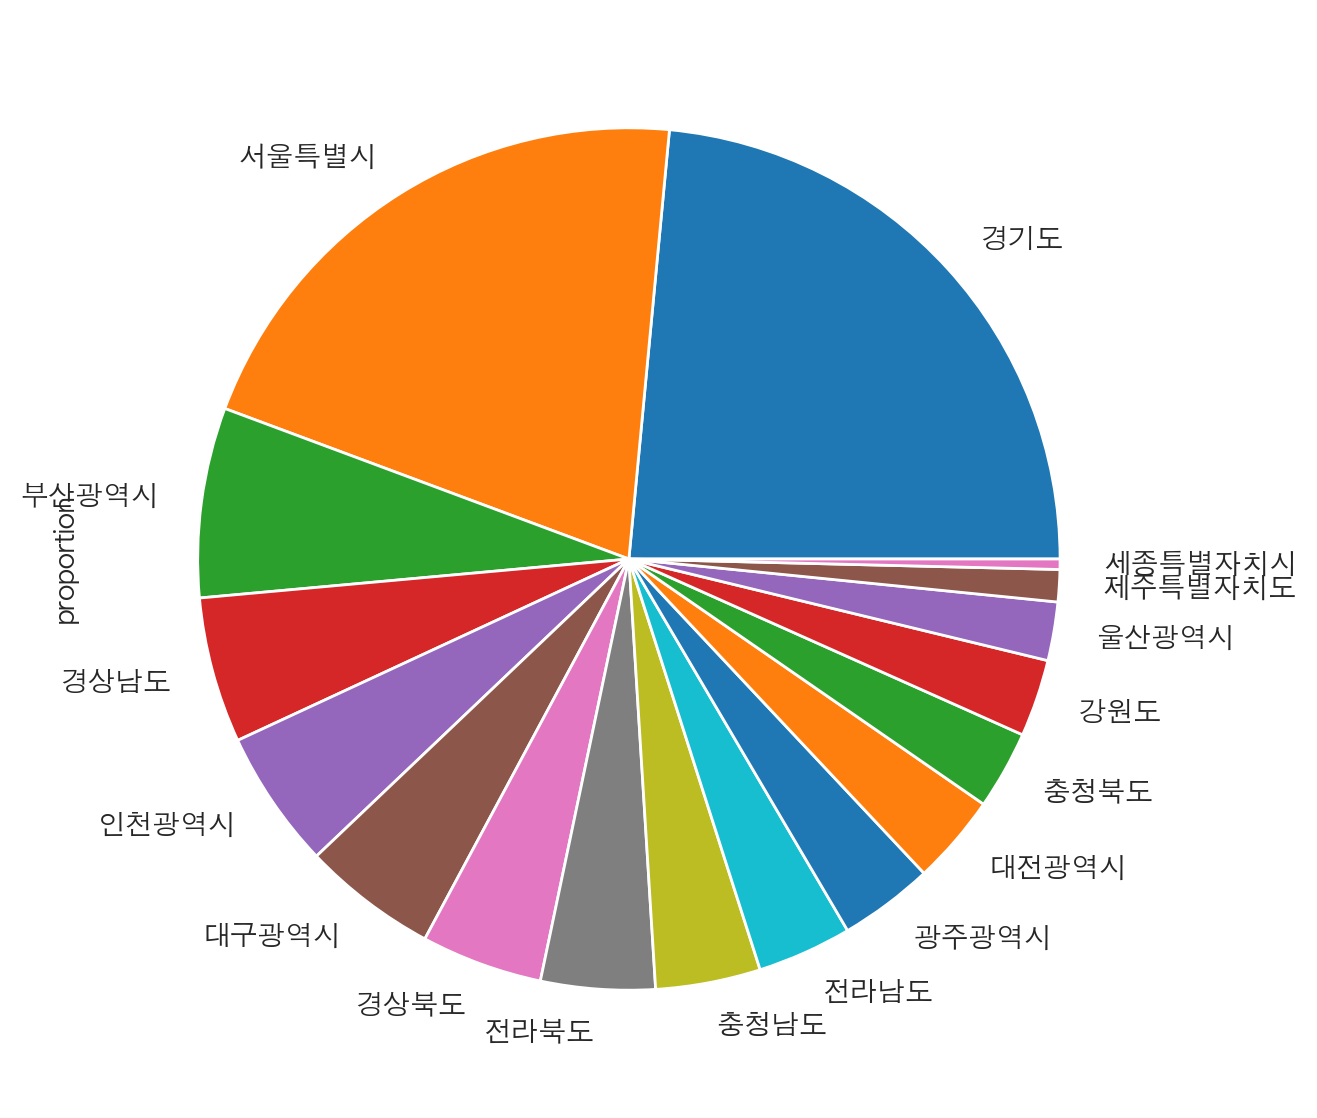

In [275]:
city_normalize.plot.pie(figsize=(7,7))

In [276]:
sns.countplot(data = df, y="시도명")       # seaborn으로도 그래프 출력 가능

ValueError: Could not interpret value `시도명` for `y`. An entry with this name does not appear in `data`.

In [ ]:
df["상권업종대분류명"].value_counts()

## 6. 데이터 색인하기
* 특정 데이터만 모아서 따로 보기

In [277]:
df_medical = df[df["상권업종중분류명"] == "약국/한약방"]      # 약국/한약방으로 분류된 데이터만 새로운 변수에 저장
df_medical.head()


,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,행정동코드,지번코드,대지구분코드,대지구분명,지번본번지,지번주소,도로명코드,도로명,도로명주소,경도,위도
4,20364049,더블유스토어수지점,S,의료,S02,약국/한약방,S02A01,약국,4146551000,4.150000e+18,1,대지,712,경기도 용인시 수지구 풍덕천동 712-2,4.150000e+11,경기도 용인시 수지구 문정로,경기도 용인시 수지구 문정로 32,127.095522,37.323528
6,20733252,춘산한약방,S,의료,S02,약국/한약방,S02A02,한약방,4211054500,4.210000e+18,1,대지,99,강원도 춘천시 중앙로2가 99,4.210000e+11,강원도 춘천시 낙원길,강원도 춘천시 낙원길 50,127.726905,37.880504
7,20582210,부부탕제원,S,의료,S02,약국/한약방,S02A03,탕제원,4311168000,4.310000e+18,1,대지,187,충청북도 청주시 상당구 금천동 187-17,4.310000e+11,충청북도 청주시 상당구 중고개로337번길,충청북도 청주시 상당구 중고개로337번길 134,127.499206,36.625355
10,21057519,민생약국,S,의료,S02,약국/한약방,S02A01,약국,4889046000,4.890000e+18,2,산,78,경상남도 합천군 용주면 월평리 78-2,4.890000e+11,경상남도 합천군 용주면 월평길,경상남도 합천군 용주면 월평길 149-35,128.118615,35.575962
13,21217689,제중당한약방,S,의료,S02,약국/한약방,S02A02,한약방,4683035000,4.680000e+18,1,대지,296,전라남도 영암군 도포면 덕화리 296,4.680000e+11,전라남도 영암군 도포면 인덕길,전라남도 영암군 도포면 인덕길 75-10,126.630348,34.834080


In [278]:
m = df["상권업종대분류명"] == "의료"
df.loc[m,"상권업종중분류명"].value_counts()    # 상권업종대분류명이 의료 인 데이터들의 상권업종중분류명만 가져오기 by .loc

상권업종중분류명
병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: count, dtype: int64

In [279]:
# 여기서 또 유사의료업만 따로 모아보기
df[df["상권업종중분류명"] == "유사의료업"]

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,행정동코드,지번코드,대지구분코드,대지구분명,지번본번지,지번주소,도로명코드,도로명,도로명주소,경도,위도
22,21013731,세종언어치료센터,S,의료,S03,유사의료업,S03B07,언어치료,2641068000,2.640000e+18,1,대지,84,부산광역시 금정구 구서동 84-1,2.640000e+11,부산광역시 금정구 중앙대로,부산광역시 금정구 중앙대로 1817-11,129.091662,35.246528
40,20933900,고려수지침학회,S,의료,S03,유사의료업,S03B03,침구원,4812353000,4.810000e+18,1,대지,5,경상남도 창원시 성산구 상남동 5-2,4.810000e+11,경상남도 창원시 성산구 마디미로4번길,경상남도 창원시 성산구 마디미로4번길 9,128.684678,35.224113
97,21717820,청명원,S,의료,S03,유사의료업,S03B09,유사의료업기타,4376037000,4.380000e+18,1,대지,241,충청북도 괴산군 청안면 금신리 241,4.380000e+11,충청북도 괴산군 청안면 금신로1길,충청북도 괴산군 청안면 금신로1길 93,127.635740,36.768935
102,21865854,응급환자이송센터,S,의료,S03,유사의료업,S03B01,응급구조대,3014063000,3.010000e+18,1,대지,248,대전광역시 중구 대사동 248-237,3.010000e+11,대전광역시 중구 계룡로921번길,대전광역시 중구 계룡로921번길 40,127.417693,36.321801
108,21914637,태화아동발달지원센터,S,의료,S03,유사의료업,S03B07,언어치료,3014072000,3.010000e+18,1,대지,27,대전광역시 중구 문화동 27,3.010000e+11,대전광역시 중구 보문산로333번길,대전광역시 중구 보문산로333번길 29,127.412725,36.312953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91300,16131218,으뜸치과기공소,S,의료,S03,유사의료업,S03B06,치과기공소,4817056500,4.820000e+18,1,대지,39,경상남도 진주시 수정동 39-11,4.820000e+11,경상남도 진주시 향교로18번길,경상남도 진주시 향교로18번길 8,128.084600,35.197029
91310,16199325,보령치과기공소,S,의료,S03,유사의료업,S03B06,치과기공소,1129052500,1.130000e+18,1,대지,103,서울특별시 성북구 동소문동4가 103-11,1.130000e+11,서울특별시 성북구 동소문로,서울특별시 성북구 동소문로 47-15,127.010602,37.591455
91311,16199088,점프셈교실,S,의료,S03,유사의료업,S03B09,유사의료업기타,4713062100,4.710000e+18,1,대지,446,경상북도 경주시 황성동 446,4.710000e+11,경상북도 경주시 용담로104번길,경상북도 경주시 용담로104번길 16,129.211755,35.865600
91319,16108560,씨앤디자인치과기공소,S,의료,S03,유사의료업,S03B06,치과기공소,1154551000,1.150000e+18,1,대지,60,서울특별시 금천구 가산동 60-25,1.150000e+11,서울특별시 금천구 벚꽃로,서울특별시 금천구 벚꽃로 234,126.886122,37.475986


In [280]:
# 상호명을 그룹화해서 갯수 세어보기
# value_counts를 사용해서 상위 10개 출력
x = df["상호명"].value_counts()
x.head(10)

상호명
리원       152
온누리약국    149
경희한의원    141
우리약국     119
중앙약국     111
전자담배      98
조은약국      95
건강약국      87
제일약국      79
사랑약국      73
Name: count, dtype: int64

In [281]:
# 유사의료업만 df_medi 변수에 담겨져 있습니다
# df_medi 변수에서 상호명으로 갯수를 세어봅니다
# 가장 많은 상호 상위 10개를 출력해봅니다
df_medi = df[df["상권업종중분류명"] == "유사의료업"]
df_medi["상호명"].value_counts().head(10)



상호명
리원          32
고려수지침       22
대한적십자사      17
헌혈의집        12
고려수지침학회     10
수치과기공소      10
제일치과기공소      9
미소치과기공소      8
아트치과기공소      8
이사랑치과기공소     8
Name: count, dtype: int64

In [282]:
# "상권업종소분류명"이 "약국" 인 것과
# "시도명"이  "서울특별시" 인 데이터만 가져옵니다.
df_seoul_drug = df[(df["상권업종소분류명"]=="약국") & (df["시도명"] == "서울특별시")]   # 괄호를 둘다 감싸주기

KeyError: '시도명'

## 7. 구별로 보기

In [283]:
# 위에서 색인한 데이터로 "시군구명"으로 그룹화 해서 갯수를 세어봅니다
# 구별로 약국이 몇개가 있는지 확인해 봅니다
c = df_seoul_drug["시군구명"].value_counts()
c.head(15)

시군구명
강남구     374
동대문구    261
광진구     212
서초구     191
송파구     188
노원구     169
성북구     160
은평구     151
영등포구    145
강서구     136
마포구     136
중랑구     129
서대문구    120
관악구     118
강동구     117
Name: count, dtype: int64

In [284]:
# normalize = True 를 통해 비율 계산하기
n = df_seoul_drug["시군구명"].value_counts(normalize = True)
n.head(15)

시군구명
강남구     0.104498
동대문구    0.072925
광진구     0.059234
서초구     0.053367
송파구     0.052529
노원구     0.047220
성북구     0.044705
은평구     0.042191
영등포구    0.040514
강서구     0.037999
마포구     0.037999
중랑구     0.036044
서대문구    0.033529
관악구     0.032970
강동구     0.032691
Name: proportion, dtype: float64

<Axes: ylabel='시군구명'>

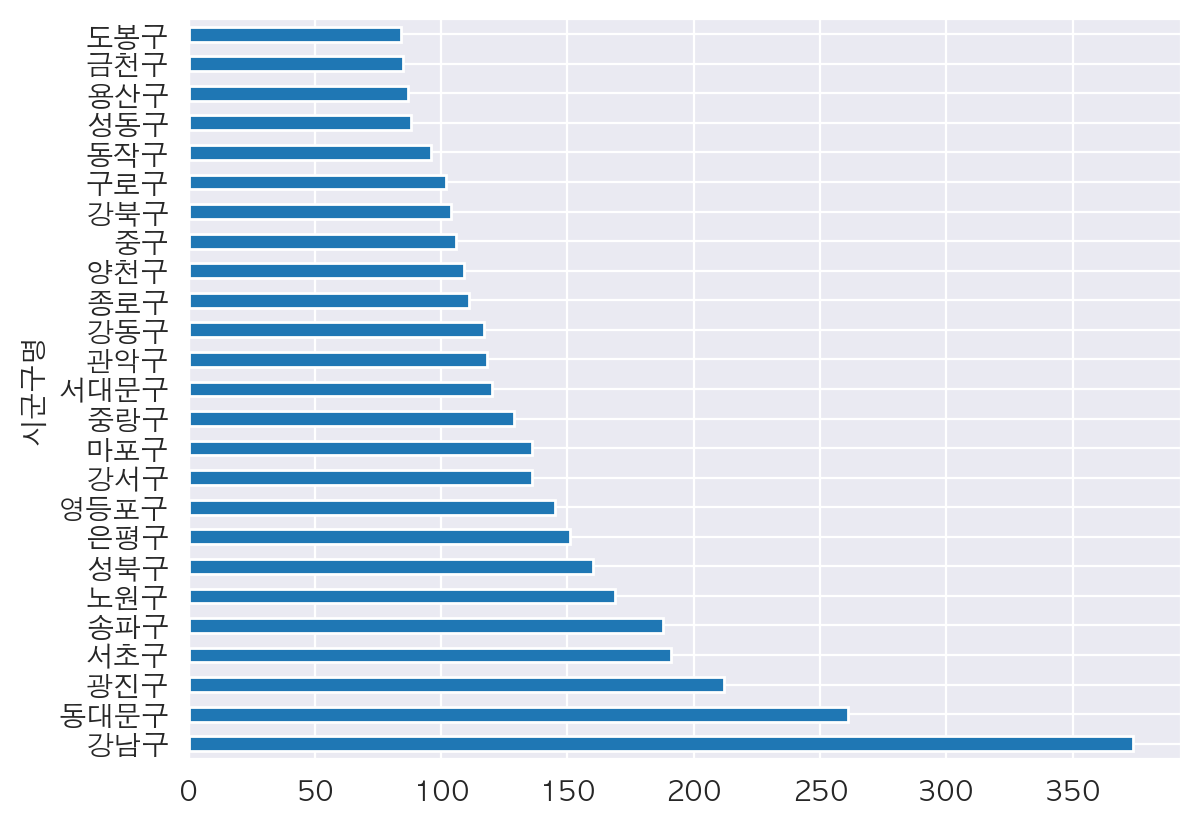

In [285]:
# 판다스의 plot을 통해 위에서 구한 결과를 막대그래프 그리기
c.plot.barh()

In [286]:
# "상권업종소분류명"이 "종합병원"인 것과
# "시도명"이 "서울특별시"인 데이터만 가져옵니다
# 결과를 df_seoul_hospital에 할당해서 재사용합니다
df_seoul_hospital = df[(df["상권업종소분류명"] == "종합병원") &  (df["시도명"] == "서울특별시")].copy()
df_seoul_hospital

KeyError: '시도명'

In [ ]:
# "시군구명"으로 그룹화해서 구별로 종합병원의 수 세어보기
d = df_seoul_hospital["시군구명"].value_counts()
d.plot.barh()

## 8.텍스트 데이터 색인하기

In [ ]:
# 색인하기 전에 상호명 중에 종합병원이 아닌 데이터를 찾아봅니다.
df_seoul_hospital.loc[~df_seoul_hospital["상호명"].str.contains("종합병원"), "상호명"].unique()

In [ ]:
# 상호명에 특정 단어가 들어가는 데이터만 가져옵니다. - 꽃배달
df_seoul_hospital[df_seoul_hospital["상호명"].str.contains("꽃배달")]

In [ ]:
# 상호명에 특정 단어가 들어가는 데이터만 가져옵니다. - 의료기
df_seoul_hospital[df_seoul_hospital["상호명"].str.contains("의료기")]

In [287]:
# "꽃배달 | 의료기 | 장례식장 | 상담소 | 어린이집 " 은 종합병원과 무관하기 때문에
# 전처리를 위해 해당 텍스트를 한 번에 검색합니다.
# 제거할 데이터의 인덱스만 drop_row 에 담아주고 list 형태로 변환합니다

drop_row = df_seoul_hospital[df_seoul_hospital["상호명"].str.contains("꽃배달|의료기|장례식장|상담소|어린이집")].index
drop_row = drop_row.tolist()
drop_row

[1917, 2803, 4431, 4644, 7938, 10283, 47008, 60645, 70177]

In [288]:
# 의원으로 끝나는 데이터도 종합병원으로 볼 수 없기 때문에 인덱스를 찾아서
# drop_row2에 담아주고 list 형태로 변환합니다
drop_row2 = df_seoul_hospital[df_seoul_hospital["상호명"].str.endswith("의원")].index
drop_row2 = drop_row2.tolist()

In [289]:
# 삭제할 행을 drop_row에 합쳐줍니다
drop_row = drop_row + drop_row2
drop_row

[1917,
 2803,
 4431,
 4644,
 7938,
 10283,
 47008,
 60645,
 70177,
 8479,
 12854,
 13715,
 14966,
 16091,
 18047,
 20200,
 20415,
 30706,
 32889,
 34459,
 34720,
 35696,
 37251,
 45120,
 49626,
 51575,
 55133,
 56320,
 56404,
 56688,
 57551,
 62113,
 76508]

In [290]:
# 해당 셀을 삭제하고 삭제 전과 후의 행의 갯수를 비교합니다
df_seoul_hospital.drop(drop_row, axis = 0)

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
305,25155642,대진의료재단,S,의료,S01,병원,S01B01,종합병원,서울특별시,11215.0,...,서울특별시 광진구 중곡동 58-25,1.120000e+11,서울특별시 광진구 긴고랑로,119,1.120000e+24,서울특별시 광진구 긴고랑로 119,143220.0,4944.0,127.088279,37.559048
353,20471487,홍익병원별관,S,의료,S01,병원,S01B01,종합병원,서울특별시,11470.0,...,서울특별시 양천구 신정동 897-13,1.150000e+11,서울특별시 양천구 국회대로,250,1.150000e+24,서울특별시 양천구 국회대로 250,158070.0,7937.0,126.862805,37.529213
385,20737057,SNUH,S,의료,S01,병원,S01B01,종합병원,서울특별시,11680.0,...,서울특별시 강남구 역삼동 736-55,1.170000e+11,서울특별시 강남구 테헤란로26길,10,1.170000e+24,서울특별시 강남구 테헤란로26길 10,135080.0,6236.0,127.035825,37.499630
2461,20024045,한양,S,의료,S01,병원,S01B01,종합병원,서울특별시,11200.0,...,서울특별시 성동구 행당동 15-1,1.120000e+11,서울특별시 성동구 마조로,22,1.120000e+24,서울특별시 성동구 마조로 22-2,133070.0,4763.0,127.041325,37.559469
2687,20890249,백산의료재단친구병원,S,의료,S01,병원,S01B01,종합병원,서울특별시,11740.0,...,서울특별시 강동구 천호동 357,1.170000e+11,서울특별시 강동구 올림픽로,684,1.170000e+24,서울특별시 강동구 올림픽로 684,134750.0,5327.0,127.125283,37.542271
2801,20867576,서울보훈병원,S,의료,S01,병원,S01B01,종합병원,서울특별시,11740.0,...,서울특별시 강동구 둔촌동 6-2,1.170000e+11,서울특별시 강동구 진황도로61길,53,1.170000e+24,서울특별시 강동구 진황도로61길 53,134791.0,5368.0,127.147914,37.528461
4285,21914819,서울대학교병원,S,의료,S01,병원,S01B01,종합병원,서울특별시,11680.0,...,서울특별시 강남구 역삼동 737,1.170000e+11,서울특별시 강남구 테헤란로,152,1.170000e+24,서울특별시 강남구 테헤란로 152,135984.0,6236.0,127.036487,37.500014
4856,22256379,제일병원,S,의료,S01,병원,S01B01,종합병원,서울특별시,11140.0,...,서울특별시 중구 묵정동 1-19,1.110000e+11,서울특별시 중구 서애로1길,17,1.110000e+24,서울특별시 중구 서애로1길 17,100380.0,4619.0,126.999620,37.561709
5005,22439143,이랜드클리닉,S,의료,S01,병원,S01B01,종합병원,서울특별시,11545.0,...,서울특별시 금천구 가산동 459-11,1.150000e+11,서울특별시 금천구 가산디지털1로,186,1.150000e+24,서울특별시 금천구 가산디지털1로 186,153792.0,8502.0,126.881568,37.481907
5089,22470053,사랑나눔의료재단,S,의료,S01,병원,S01B01,종합병원,서울특별시,11410.0,...,서울특별시 서대문구 충정로3가 464,1.140000e+11,서울특별시 서대문구 서소문로,21,1.140000e+24,서울특별시 서대문구 서소문로 21,120723.0,3742.0,126.964070,37.559888


<Axes: xlabel='시군구명', ylabel='count'>

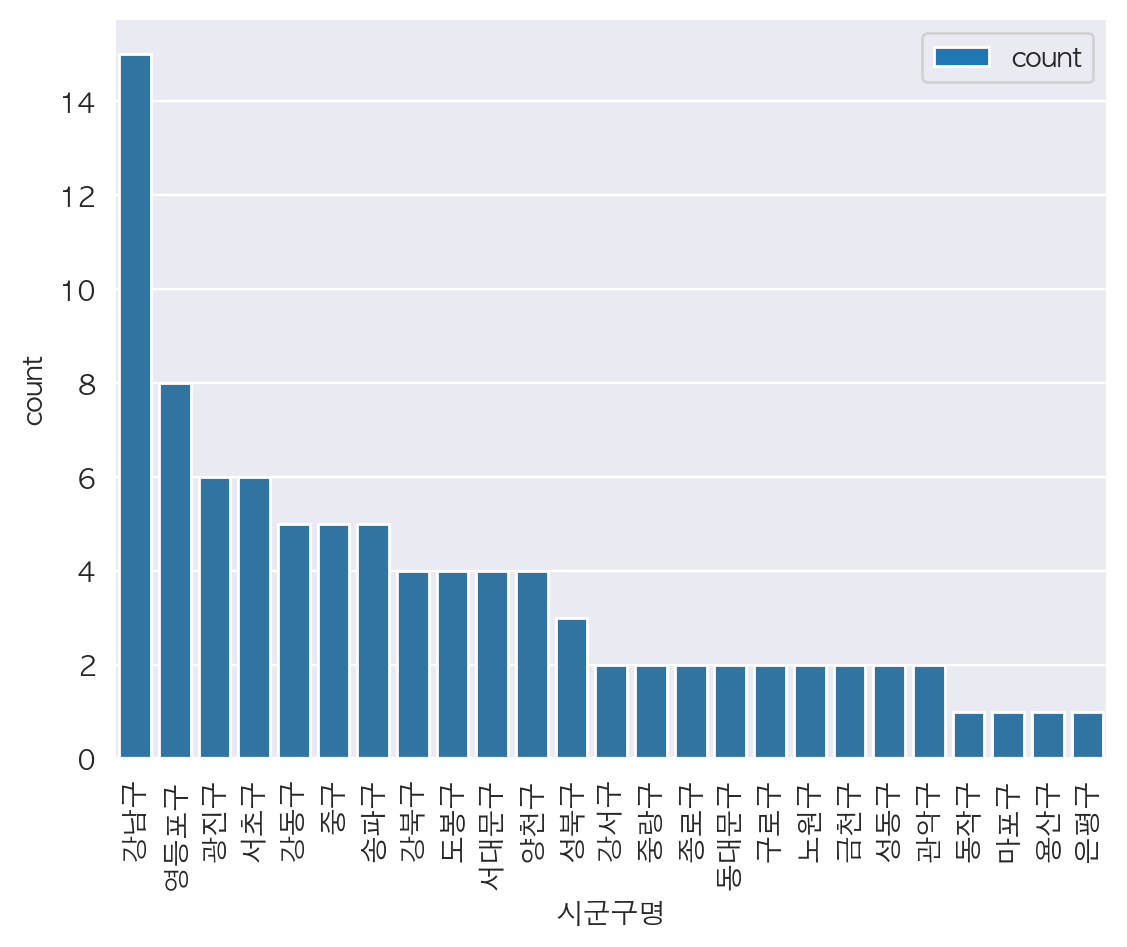

In [291]:
# 시군구명에 따라 종합병원의 숫자를 countplot으로 그립니다
df_seoul_hospital["시군구명"].value_counts().plot.bar()
sns.countplot(data = df_seoul_hospital , x="시군구명",              
              order = df_seoul_hospital["시군구명"].value_counts().index) #시군구명 별 병원 숫자를 센 것의 인덱스를 가져오기 때문에 자동으로 많은순서

In [292]:
# 전처리 후 다시 원본 데이터 확인하기
df_seoul_hospital["상호명"].unique()

array(['대진의료재단', '홍익병원별관', 'SNUH', '평화드림여의도성모병원의료기매장', '한양', '백산의료재단친구병원',
       '서울보훈병원', '서울성모병원장례식장꽃배달', '서울대학교병원', '알콜중독및정신질환상담소',
       '강남성모병원장례식장꽃배달', '제일병원', '이랜드클리닉', '사랑나눔의료재단', '우울증센터', '성심의료재단',
       '다나의료재단', '서울아산병원신관', '원자력병원장례식장', '국민의원', '고려대학교구로병원', '학교법인일송학원',
       '삼성의료원장례식장', '희명스포츠의학센터인공신장실', '연세대학교의과대학강남세브란스', '국립정신병원',
       '코아클리닉', '수서제일의원', '사랑의의원', '한국전력공사부속한일병원', '신촌연세병원', '창동제일의원',
       '영동세브란스병원', '제일성심의원', '삼성의료재단강북삼성태', '서울시립보라매병원', '서울이의원',
       '서울대학교병원비상계획외래', '평화드림서울성모병원의료', '홍익병원', '사랑나눔의료재단서', '독일의원',
       '서울연합의원', '우신향병원', '동부제일병원', '아산재단금강병원', '명곡안연구소', '아산재단서울중앙병원',
       '메디힐특수여객', '삼성생명공익재단삼성서', '성광의료재단차병원', '한국건강관리협회서울특',
       '정해복지부설한신메디피아', '성베드로병원', '성애의료재단', '실로암의원', 'Y&T성모마취과', '광진성모의원',
       '서울현대의원', '이노신경과의원', '송정훼밀리의원', '서울중앙의원', '영남의료재단', '인제대학교서울백병원',
       '한국필의료재단', '세브란스의원', '가톨릭대학교성바오로병원장례식장', '서울연세의원', '사랑의병원',
       '성삼의료재단미즈메디병원', '씨엠충무병원', '성신의원', '원진재단부설녹색병원', '송파제일의원',
       '카톨릭성모의원', '한양성심의원', '관악

## 9. 특정 지역만 보기

In [237]:
# 서울에 있는 데이터의 위도와 경도를 봅니다.
# 결과를 df_seoul 이라는 데이터프레임에 저장합니다
# 새로운 변수에 데이터프레임을 저장시 copy()를 사용합니다

df_seoul = df.loc[df["시도명"] == "서울특별시"].copy()
df_seoul.head()

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
1,20024149,타워광명내과의원,S,의료,S01,병원,S01B07,내과/외과,서울특별시,11680.0,...,서울특별시 강남구 도곡동 467-14,1.170000e+11,서울특별시 강남구 언주로30길,39,1.170000e+24,서울특별시 강남구 언주로30길 39,135270.0,6292.0,127.053198,37.488742
8,20808534,코원성형외과,S,의료,S01,병원,S01B08,정형/성형외과,서울특별시,11680.0,...,서울특별시 강남구 신사동 592-4,1.170000e+11,서울특별시 강남구 논현로,826,1.170000e+24,서울특별시 강남구 논현로 826,135893.0,6025.0,127.028531,37.522223
9,20755460,헬로스마일소아과,S,의료,S01,병원,S01B11,소아과,서울특별시,11680.0,...,서울특별시 강남구 논현동 39-18,1.170000e+11,서울특별시 강남구 논현로131길,30,1.170000e+24,서울특별시 강남구 논현로131길 30,135010.0,6045.0,127.027878,37.514144
31,20872995,고운나라성형외과,S,의료,S01,병원,S01B08,정형/성형외과,서울특별시,11740.0,...,서울특별시 강동구 성내동 9-5,1.170000e+11,서울특별시 강동구 천호대로,1032,1.170000e+24,서울특별시 강동구 천호대로 1032,134030.0,5379.0,127.126507,37.537333
33,20816709,이즈타워약,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11680.0,...,서울특별시 강남구 역삼동 821,1.170000e+11,서울특별시 강남구 테헤란로,101,1.170000e+24,서울특별시 강남구 테헤란로 101,135080.0,6134.0,127.028023,37.498656


<Axes: xlabel='시군구명', ylabel='count'>

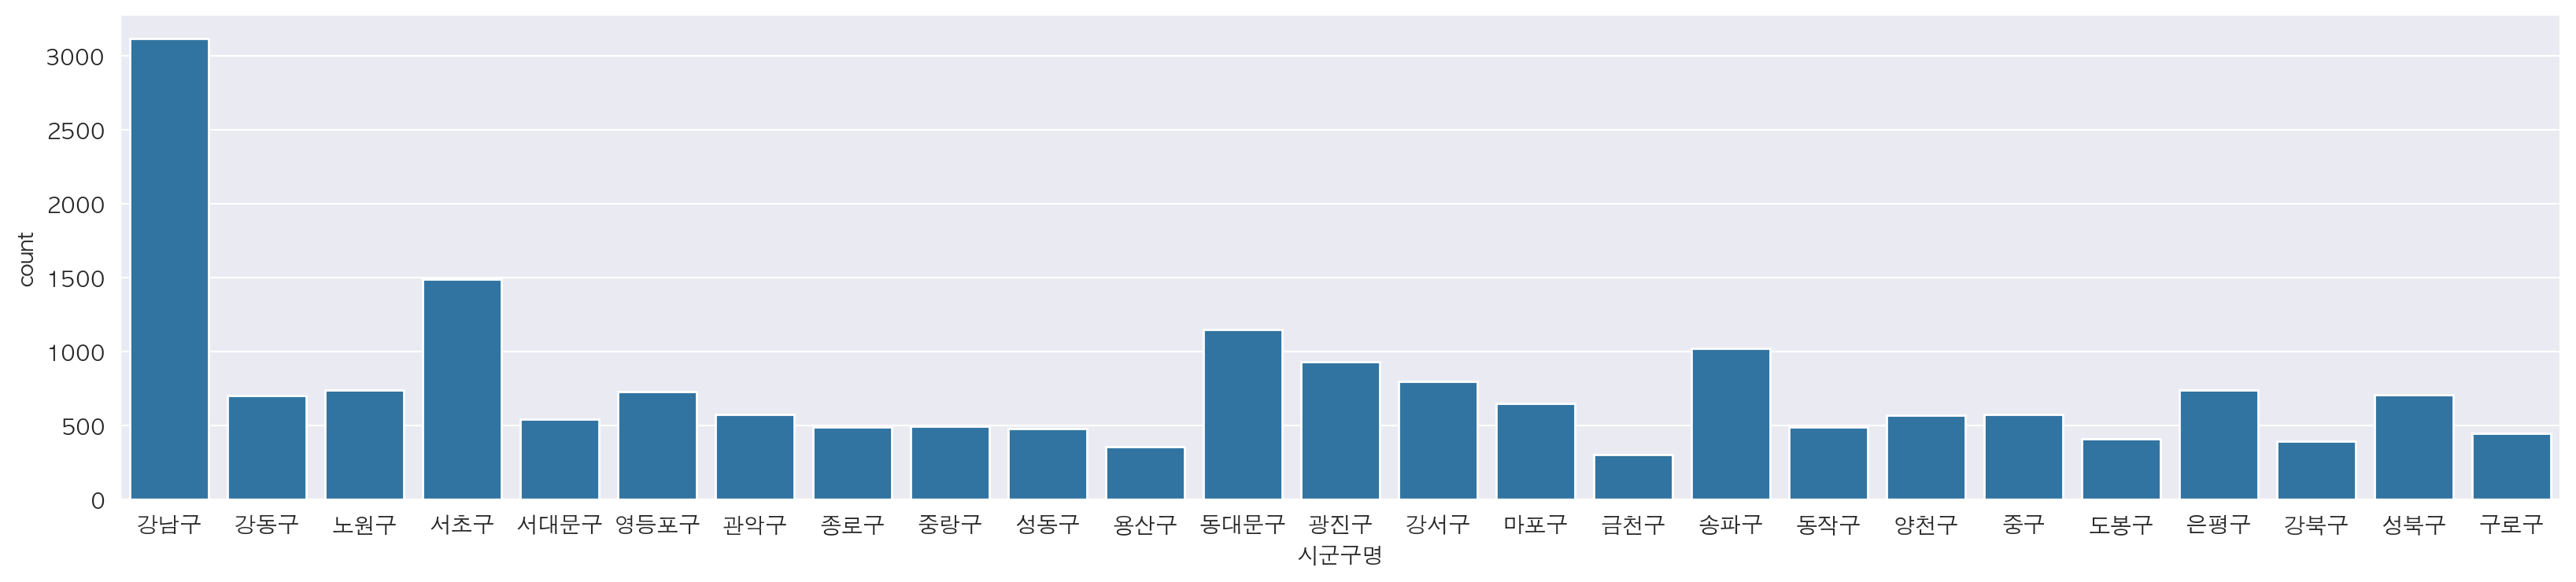

In [297]:
# seaborn의 countplot을 사용해서 위에서 만든 df_seoul 데이터프레임의
# 시군구명을 시각화합니다
plt.figure(figsize=(20,4))
sns.countplot(data = df_seoul, x="시군구명")

<Axes: xlabel='경도', ylabel='위도'>

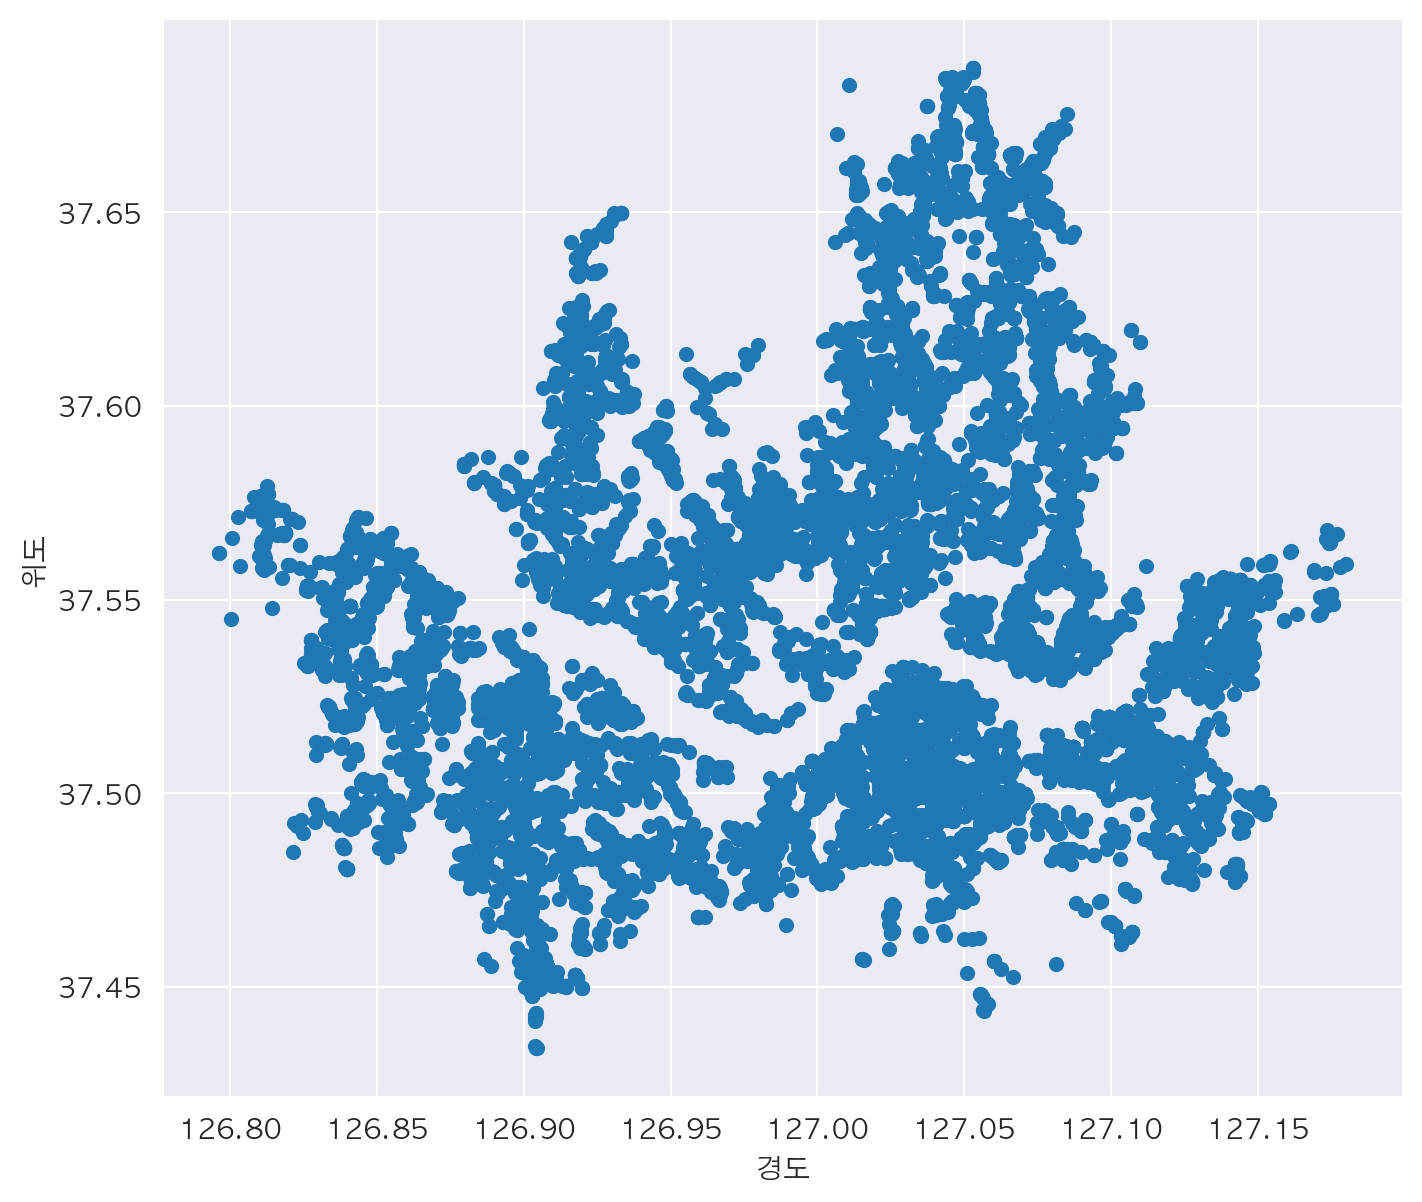

In [301]:
# pandas의 plot.scatter를 통해 경도와 위도를 표시해봅니다
df_seoul.plot.scatter(x="경도", y="위도", figsize=(8,7), grid=True)

<Axes: xlabel='경도', ylabel='위도'>

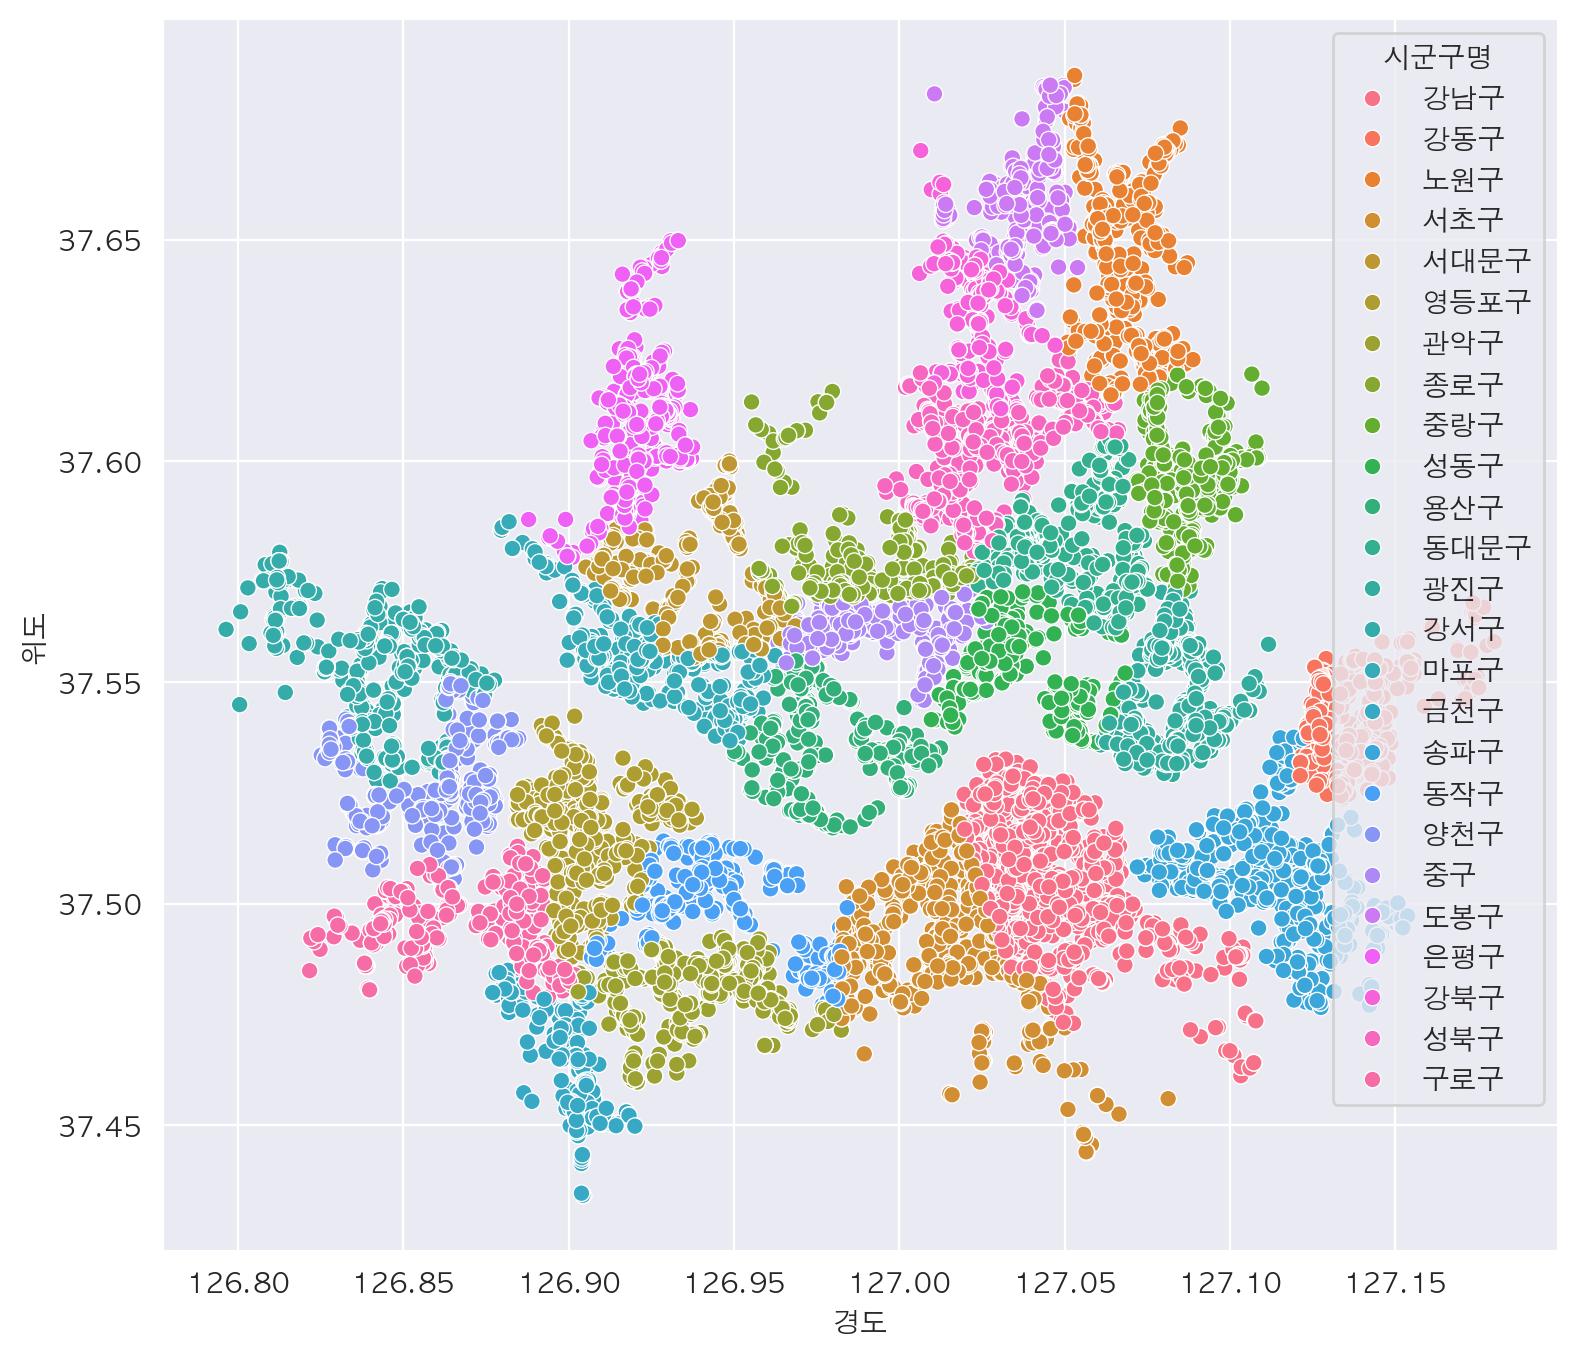

In [304]:
# seaborn의 scatterplot을 통해 구별 경도와 위도를 표시해봅시다
plt.figure(figsize=(9,8))
sns.scatterplot(data = df_seoul, x="경도", y = "위도", hue = "시군구명")        # hue를 통해 점마다 다른 분류 색칠 -> 마치 color = 컬럼 넣는

<Axes: xlabel='경도', ylabel='위도'>

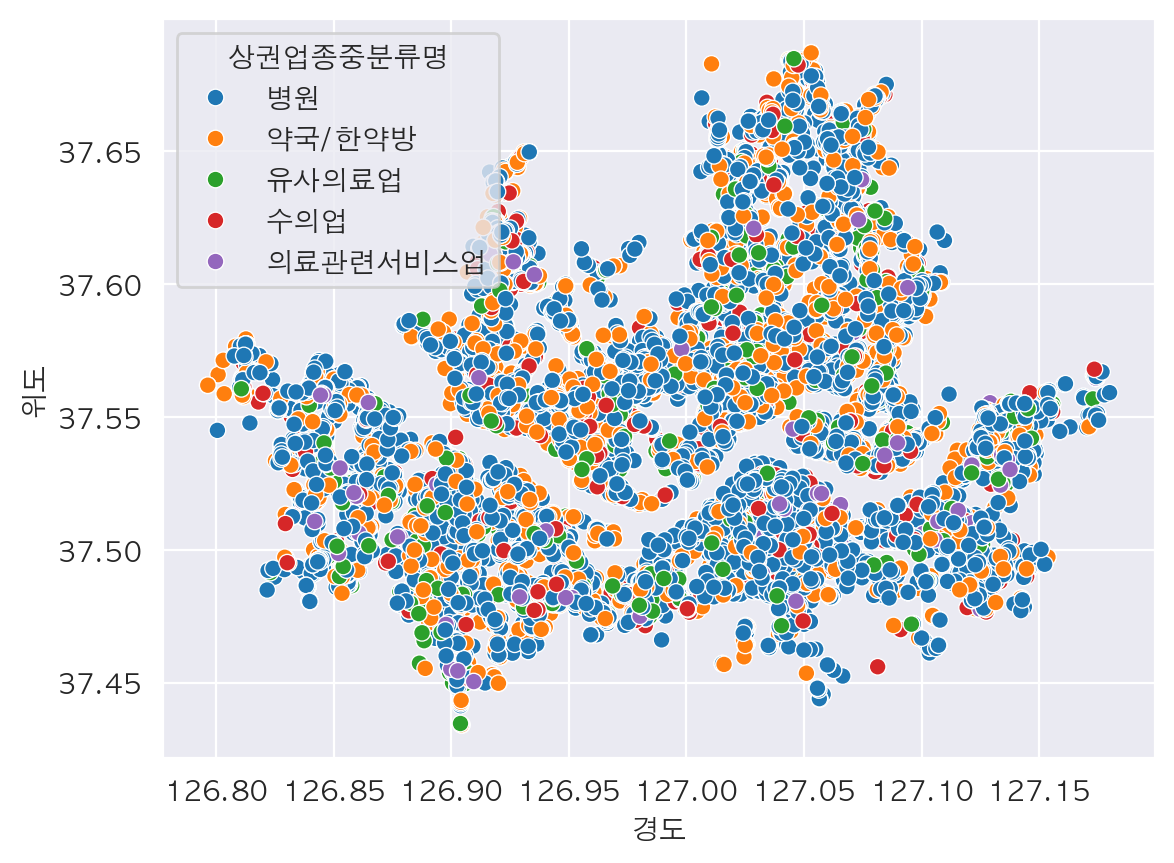

In [305]:
# seaborn을 통해 "상권업종중분류명" 별로 경도 위도 표시
sns.scatterplot(data = df_seoul, x="경도", y="위도", hue = "상권업종중분류명")

In [324]:
# seaborn을 통해 전국 데이터로 구별 경도와 위도를 표시
plt.figure(figsize=(16,12))
#sns.scatterplot(data=df , x="경도", y="위도", hue = "시군구명")

<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

## 10.folium으로 지도에 표현하기

In [350]:
import folium
map = folium.Map(location=[df_seoul_hospital["위도"].mean(),df_seoul_hospital["경도"].mean()],
           zoom_start=12)

for i in df_seoul_hospital.index:
    name = df_seoul_hospital.loc[i , "상호명"] 
    location = [df_seoul_hospital.loc[i,"위도"] , df_seoul_hospital.loc[i,"경도"]]
    address = df_seoul_hospital.loc[i,"도로명주소"]
    popup = f"{name}-{address}"
    folium.Marker(location = location,
                  popup = popup,
                  ).add_to(map)
map